#### Info on various cautions which are sprinkled in the notebooks, in the form of *Note*, *Important*, *Useful* and *Explanation*.

- *Note:* These sections contains information which is of genreal importance within the domain of data-analysis, specific libraries or have info which has found no specific categrory.
- *Important:* These are sections which contains the same as of notes but, without the consideration of which the results achieved might be way afar from the expected ones.
- *Useful:* Any suggestion which can contribute to the effciency of concept implementation, finds space in these sections.
- *Explanation:* Info packets in these sections are very specific to the scenarios faced within the context of the book, like which values should be imputed in a specific column or why it is justified to drop a specific column. These kind of actions are specific to datasets and understand of subject-matter.

# Data Wrangling

Data wrangling, also known as Data Manipulation, is mostly a three part process performed both in linear order or non-linear(refers ) order to convert the data into a format which is useful for the analysis or modelling. The three parts are:

1. Data Cleaning
2. Data Transformation
3. Data Enrichment

In [1]:
# from google.colab import drive
# drive.mount('/contnet/drive')

!git clone https://github.com/OfTheByteQuest/Data-Analytics-Learning-and-Projects.git
%cd Data-Analytics-Learning-and-Projects

Cloning into 'Data-Analytics-Learning-and-Projects'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 96 (delta 16), reused 31 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (96/96), 1.23 MiB | 5.49 MiB/s, done.
Resolving deltas: 100% (16/16), done.
/content/Data-Analytics-Learning-and-Projects


### Data Transformation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!ls -lh /content/Data-Analytics-Learning-and-Projects/Chapter-3/Data

total 168K
-rw-r--r-- 1 root root  47K Mar 12 16:49 bitcoin.csv
-rw-r--r-- 1 root root  46K Mar 12 16:49 dirty_data.csv
-rw-r--r-- 1 root root 5.4K Mar 12 16:49 long_data.csv
-rw-r--r-- 1 root root 5.3K Mar 12 16:49 nyc_temperatures.csv
-rw-r--r-- 1 root root  52K Mar 12 16:49 sp500.csv
-rw-r--r-- 1 root root  794 Mar 12 16:49 wide_data.csv


In [ ]:
!head -n 2 /content/Data-Analytics-Learning-and-Projects/Chapter-3/Data/wide_data.csv

date,TMAX,TMIN,TOBS
2018-10-01,21.1,8.9,13.9


In [ ]:
!head -n 2 /content/Data-Analytics-Learning-and-Projects/Chapter-3/Data/long_data.csv

attributes,datatype,date,station,value
",,H,0700",TMAX,2018-10-01T00:00:00,GHCND:USC00280907,21.1


In [ ]:
wide_df = pd.read_csv('/content/Data-Analytics-Learning-and-Projects/Chapter-3/Data/wide_data.csv',
                      parse_dates = True)
long_df = pd.read_csv('/content/Data-Analytics-Learning-and-Projects/Chapter-3/Data/long_data.csv',
                      usecols = ['date', 'datatype', 'value'],
                      parse_dates = True)[['date', 'datatype', 'value']] # to restructure the columns' order

In [ ]:
wide_df.head(6)

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1
3,2018-10-04,22.8,11.7,11.7
4,2018-10-05,23.3,11.7,18.9
5,2018-10-06,20.0,13.3,16.1


In [ ]:
wide_df.describe(include = 'all')

,date,TMAX,TMIN,TOBS
count,31,31.000000,31.000000,31.000000
unique,31,NaN,NaN,NaN
top,2018-10-01,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,16.829032,7.561290,10.022581
std,NaN,5.714962,6.513252,6.596550
min,NaN,7.800000,-1.100000,-1.100000
25%,NaN,12.750000,2.500000,5.550000
50%,NaN,16.100000,6.700000,8.300000
75%,NaN,21.950000,13.600000,16.100000


<Axes: title={'center': 'Temperature in NYC in Ocotober 2018'}, xlabel='Date', ylabel='Temperature in Celsius'>

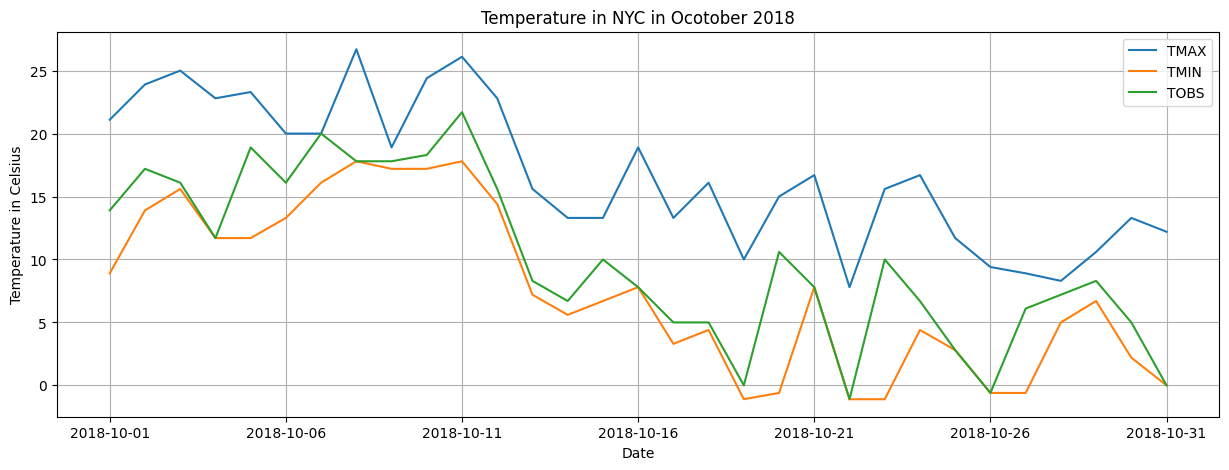

In [ ]:
wide_df.plot(
    kind = 'line',
    y=['TMAX', 'TMIN', 'TOBS'],
    x = 'date',
    title = 'Temperature in NYC in Ocotober 2018',
    figsize = (15, 5),
    xlabel = 'Date',
    ylabel = 'Temperature in Celsius',
    grid = True,
    legend = True
)

In [ ]:
long_df.head(6)

,date,datatype,value
0,2018-10-01T00:00:00,TMAX,21.1
1,2018-10-01T00:00:00,TMIN,8.9
2,2018-10-01T00:00:00,TOBS,13.9
3,2018-10-02T00:00:00,TMAX,23.9
4,2018-10-02T00:00:00,TMIN,13.9
5,2018-10-02T00:00:00,TOBS,17.2


In [ ]:
long_df.describe(include='all')

,date,datatype,value
count,93,93,93.000000
unique,31,3,NaN
top,2018-10-01T00:00:00,TMAX,NaN
freq,3,31,NaN
mean,NaN,NaN,11.470968
std,NaN,NaN,7.362354
min,NaN,NaN,-1.100000
25%,NaN,NaN,6.700000
50%,NaN,NaN,11.700000
75%,NaN,NaN,17.200000


***Note:*** Pandas expects its data for plotting to be in the wide format, so, in order to easily make the same plot that we did with the wide format data, we must use another plotting library, called seaborn.

In [ ]:
import seaborn as sns

In [ ]:
sns.set(rc={'figure.figsize':(15,5)},
        style = 'white')

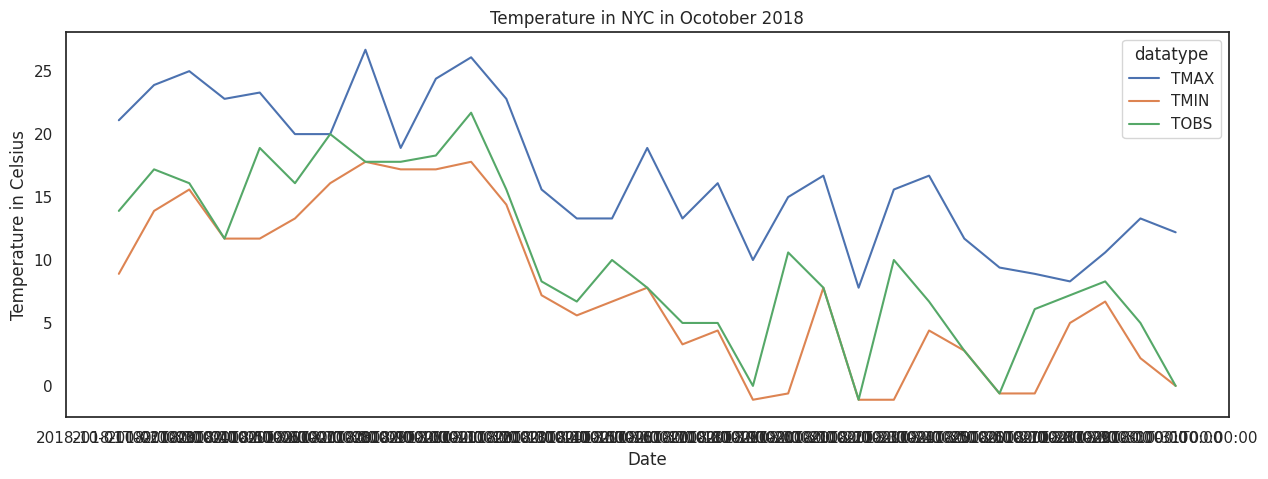

In [ ]:
ax = sns.lineplot(
    data = long_df,
    hue = 'datatype',
    y = 'value',
    x = 'date',
)

ax.set_ylabel('Temperature in Celsius')
ax.set_xlabel('Date')
ax.set_title('Temperature in NYC in Ocotober 2018')
plt.show()

In [ ]:
# dir(ax)

In [ ]:
# ax.hlines?

### Data Enrichment

Data enrichement is the process of enhancing the raw data by supplementing it with additional, relevant information from either external soruces or internal sources.

Following are the ways to enhance data using original data:

1. **Adding new columns:** Creating new, relevant columns from the already existing columns and appending them to the original dataframe.
2. **Binning:** Turning the continuous or discrete data with many disitinct values into range buckets, which makes the column discrete while letting us control the number of possible values in the columns.
3. **Aggregating:** Rolling up the data and summarizing it.
4. **Resampling:** Changing the frequncy of observations, mainly of timeseries data, by either upsampling or downsampling.

    Types of Resampling:

    - Downsampling – Reducing the frequency of data (e.g., converting daily data to monthly data).
    - Upsampling – Increasing the frequency of data (e.g., filling in missing hourly data from daily data).
    - Interpolation – Estimating values in between existing data points.

In [ ]:
!pip install python-dotenv

In [ ]:
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

In [ ]:
import requests

In [ ]:
def make_request(endpoint, payload=None):
  """
  Make a request to a specific endpoint con the weather API
  passing header and optional payload.

  Paramters:
    - endpoint: The endpoint of the API you want to make a GET request to.
    - payload: A dictionary of data to pass along with the request.

  Returns: Response object.
  """
  return requests.get(
      f'https://www.ncdc.noaa.gov/cdo-web/api/v2/{endpoint}',
      headers = {
          'token': os.environ['NCDC_TOKEN']
      },
      params = payload
  )

The request made below gives the info of all the datasets which the ncdc endpoint we are using provides. Further on the code, we will make another request to get info from one of these specific datasets.

In [ ]:
response = make_request('datasets')
response.status_code

200

In [ ]:
response.json().keys()

dict_keys(['metadata', 'results'])

In [ ]:
response.json()['metadata']

{'resultset': {'offset': 1, 'count': 11, 'limit': 25}}

In [ ]:
type(response.json()['results']), len(response.json()['results'])

(list, 11)

In [ ]:
response.json()['results'][0]

{'uid': 'gov.noaa.ncdc:C00861',
 'mindate': '1763-01-01',
 'maxdate': '2025-03-10',
 'name': 'Daily Summaries',
 'datacoverage': 1,
 'id': 'GHCND'}

In [ ]:
response.json()['results'][0].keys()

dict_keys(['uid', 'mindate', 'maxdate', 'name', 'datacoverage', 'id'])

In [ ]:
[(data['id'], data['name']) for data in response.json()['results']]

[('GHCND', 'Daily Summaries'),
 ('GSOM', 'Global Summary of the Month'),
 ('GSOY', 'Global Summary of the Year'),
 ('NEXRAD2', 'Weather Radar (Level II)'),
 ('NEXRAD3', 'Weather Radar (Level III)'),
 ('NORMAL_ANN', 'Normals Annual/Seasonal'),
 ('NORMAL_DLY', 'Normals Daily'),
 ('NORMAL_HLY', 'Normals Hourly'),
 ('NORMAL_MLY', 'Normals Monthly'),
 ('PRECIP_15', 'Precipitation 15 Minute'),
 ('PRECIP_HLY', 'Precipitation Hourly')]

In [ ]:
response = make_request('datacategories', payload={'datasetid': 'GHCND'})
response.status_code

200

In [ ]:
response.json().keys()

dict_keys(['metadata', 'results'])

In [ ]:
type(response.json()['results']), len(response.json()['results'])

(list, 9)

In [ ]:
response.json()['results']

[{'name': 'Evaporation', 'id': 'EVAP'},
 {'name': 'Land', 'id': 'LAND'},
 {'name': 'Precipitation', 'id': 'PRCP'},
 {'name': 'Sky cover & clouds', 'id': 'SKY'},
 {'name': 'Sunshine', 'id': 'SUN'},
 {'name': 'Air Temperature', 'id': 'TEMP'},
 {'name': 'Water', 'id': 'WATER'},
 {'name': 'Wind', 'id': 'WIND'},
 {'name': 'Weather Type', 'id': 'WXTYPE'}]

To get the *Temperature* data we have to make request to `datatypes` endpoint with `datacategoryid: 'TEMP'`.

In [ ]:
response = make_request('datatypes', payload={
    'datacategoryid': 'TEMP',
    'limit': 100
})
response.status_code

200

In [ ]:
response.json().keys()

dict_keys(['metadata', 'results'])

In [ ]:
type(response.json()['results']), len(response.json()['results'])

(list, 59)

In [ ]:
response.json()['results'][0:5]

[{'mindate': '1763-01-01',
  'maxdate': '2025-02-01',
  'name': 'Cooling Degree Days Season to Date',
  'datacoverage': 1,
  'id': 'CDSD'},
 {'mindate': '1863-05-04',
  'maxdate': '2025-03-06',
  'name': 'Number of days included in the multiday minimum temperature (MDTN)',
  'datacoverage': 1,
  'id': 'DATN'},
 {'mindate': '1863-05-04',
  'maxdate': '2025-03-05',
  'name': 'Number of days included in the multiday maximum temperature (MDTX)',
  'datacoverage': 1,
  'id': 'DATX'},
 {'mindate': '2010-01-01',
  'maxdate': '2010-12-31',
  'name': 'Long-term averages of daily diurnal temperature range',
  'datacoverage': 1,
  'id': 'DLY-DUTR-NORMAL'},
 {'mindate': '2010-01-01',
  'maxdate': '2010-12-31',
  'name': 'Long-term standard deviations of daily diurnal temperature range',
  'datacoverage': 1,
  'id': 'DLY-DUTR-STDDEV'}]

***Note:*** The National Centers for Environmental Information (NCEI), formerly known as the National Climatic Data Center (NCDC), has updated its API endpoints and response formats over time so, the data fetched and used in the exmaples in the book differs. As a result we **might** the `csv` file provided by the book if, there is any inconsistency between the book and the API response which might affect our learning.

In [ ]:
response = make_request(
    'locationcategories',
    {'datasetid':'GHCND'}
)
response.status_code

200

In [ ]:
import pprint

In [ ]:
pprint.pprint(response.json())

{'metadata': {'resultset': {'count': 12, 'limit': 25, 'offset': 1}},
 'results': [{'id': 'CITY', 'name': 'City'},
             {'id': 'CLIM_DIV', 'name': 'Climate Division'},
             {'id': 'CLIM_REG', 'name': 'Climate Region'},
             {'id': 'CNTRY', 'name': 'Country'},
             {'id': 'CNTY', 'name': 'County'},
             {'id': 'HYD_ACC', 'name': 'Hydrologic Accounting Unit'},
             {'id': 'HYD_CAT', 'name': 'Hydrologic Cataloging Unit'},
             {'id': 'HYD_REG', 'name': 'Hydrologic Region'},
             {'id': 'HYD_SUB', 'name': 'Hydrologic Subregion'},
             {'id': 'ST', 'name': 'State'},
             {'id': 'US_TERR', 'name': 'US Territory'},
             {'id': 'ZIP', 'name': 'Zip Code'}]}


In [ ]:
# help(pprint)

In [ ]:
make_request

<function __main__.make_request(endpoint, payload=None)>

In [ ]:
def get_item(name, what, endpoint, start=1, end=None):
    """
    Grab the JSON payload for a given field by name using binary search.

    Parameters:
        - name: The item to look for.
        - what: Dictionary specifying what the item in `name` is.
        - endpoint: Where to look for the item.
        - start: The position to start at. We don't need to touch this, but the
                 function will manipulate this with recursion.
        - end: The last position of the cities. Used to find the midpoint, but
               like `start` this is not something we need to worry about.

    Returns:
        Dictionary of the information for the item if found otherwise
        an empty dictionary.
    """
    # find the midpoint which we use to cut the data in half each time
    mid = (start + (end if end else 1)) // 2

    # lowercase the name so this is not case-sensitive
    name = name.lower()

    # define the payload we will send with each request
    payload = {
        'datasetid' : 'GHCND',
        'sortfield' : 'name',
        'offset' : mid, # we will change the offset each time
        'limit' : 1 # we only want one value back
    }

    # make our request adding any additional filter parameters from `what`
    response = make_request(endpoint, {**payload, **what})

    if response.ok:
        # if response is ok, grab the end index from the response metadata the first time through
        end = end if end else response.json()['metadata']['resultset']['count']

        # grab the lowercase version of the current name
        current_name = response.json()['results'][0]['name'].lower()

        # if what we are searching for is in the current name, we have found our item
        if name in current_name:
            return response.json()['results'][0] # return the found item
        else:
            if start >= end:
                # if our start index is greater than or equal to our end, we couldn't find it
                return {}
            elif name < current_name:
                # our name comes before the current name in the alphabet, so we search further to the left
                return get_item(name, what, endpoint, start, mid - 1)
            elif name > current_name:
                # our name comes after the current name in the alphabet, so we search further to the right
                return get_item(name, what, endpoint, mid + 1, end)
    else:
        # response wasn't ok, use code to determine why
        print(f'Response not OK, status: {response.status_code}')

def get_location(name):
    """
    Grab the JSON payload for the location by name using binary search.

    Parameters:
        - name: The city to look for.

    Returns:
        Dictionary of the information for the city if found otherwise
        an empty dictionary.
    """
    return get_item(name, {'locationcategoryid' : 'CITY'}, 'locations')

In [ ]:
nyc = get_location('New York')
nyc

Response not OK, status: 429


**!Important:** Using the `csv` file in the data as due to status code `429` we cannot make more requests for some time.

In [ ]:
df = pd.read_csv("/content/Data-Analytics-Learning-and-Projects/Chapter-3/Data/nyc_temperatures.csv")
df.head()

,attributes,datatype,date,station,value
0,"H,,S,",TAVG,2018-10-01T00:00:00,GHCND:USW00014732,21.2
1,",,W,2400",TMAX,2018-10-01T00:00:00,GHCND:USW00014732,25.6
2,",,W,2400",TMIN,2018-10-01T00:00:00,GHCND:USW00014732,18.3
3,"H,,S,",TAVG,2018-10-02T00:00:00,GHCND:USW00014732,22.7
4,",,W,2400",TMAX,2018-10-02T00:00:00,GHCND:USW00014732,26.1


In [ ]:
df.columns

Index(['attributes', 'datatype', 'date', 'station', 'value'], dtype='object')

In [ ]:
df.rename(columns={
    'value':'temp_C',
    'attributes': 'flags'
    }, inplace=True
)

In [ ]:
# df.rename

In [ ]:
df.columns

Index(['flags', 'datatype', 'date', 'station', 'temp_C'], dtype='object')

In [ ]:
df.dtypes

,0
flags,object
datatype,object
date,object
station,object
temp_C,float64


In [ ]:
# df.loc[:, 'date'] = pd.to_datetime(df['date'], errors = 'coerce')
# for some reason the command is not working, atlhough, the data type of the
# date column is modified but, the assignment is not working

df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.date.tail(2)

,date
91,2018-10-31
92,2018-10-31


In [ ]:
df.dtypes

,0
flags,object
datatype,object
date,datetime64[ns]
station,object
temp_C,float64


In [ ]:
# pd.to_datetime?

In [ ]:
df.date.size

93

In [ ]:
df.date.describe()

,date
count,93
mean,2018-10-16 00:00:00
min,2018-10-01 00:00:00
25%,2018-10-08 00:00:00
50%,2018-10-16 00:00:00
75%,2018-10-24 00:00:00
max,2018-10-31 00:00:00


In [ ]:
eastern = pd.read_csv(
   "/content/Data-Analytics-Learning-and-Projects/Chapter-3/Data/nyc_temperatures.csv",
   index_col = 'date',
   parse_dates=True,
).tz_localize('EST')

In [ ]:
eastern.head()

,attributes,datatype,station,value
date,,,,
2018-10-01 00:00:00-05:00,"H,,S,",TAVG,GHCND:USW00014732,21.2
2018-10-01 00:00:00-05:00,",,W,2400",TMAX,GHCND:USW00014732,25.6
2018-10-01 00:00:00-05:00,",,W,2400",TMIN,GHCND:USW00014732,18.3
2018-10-02 00:00:00-05:00,"H,,S,",TAVG,GHCND:USW00014732,22.7
2018-10-02 00:00:00-05:00,",,W,2400",TMAX,GHCND:USW00014732,26.1


In [ ]:
eastern.tz_convert('UTC').head()

,attributes,datatype,station,value
date,,,,
2018-10-01 05:00:00+00:00,"H,,S,",TAVG,GHCND:USW00014732,21.2
2018-10-01 05:00:00+00:00,",,W,2400",TMAX,GHCND:USW00014732,25.6
2018-10-01 05:00:00+00:00,",,W,2400",TMIN,GHCND:USW00014732,18.3
2018-10-02 05:00:00+00:00,"H,,S,",TAVG,GHCND:USW00014732,22.7
2018-10-02 05:00:00+00:00,",,W,2400",TMAX,GHCND:USW00014732,26.1


***Note:*** Truncation of index through the `to_periods` methods changes its class from `DateRange` to `PeriodRange`.

In [ ]:
eastern.index

DatetimeIndex(['2018-10-01 00:00:00-05:00', '2018-10-01 00:00:00-05:00',
               '2018-10-01 00:00:00-05:00', '2018-10-02 00:00:00-05:00',
               '2018-10-02 00:00:00-05:00', '2018-10-02 00:00:00-05:00',
               '2018-10-03 00:00:00-05:00', '2018-10-03 00:00:00-05:00',
               '2018-10-03 00:00:00-05:00', '2018-10-04 00:00:00-05:00',
               '2018-10-04 00:00:00-05:00', '2018-10-04 00:00:00-05:00',
               '2018-10-05 00:00:00-05:00', '2018-10-05 00:00:00-05:00',
               '2018-10-05 00:00:00-05:00', '2018-10-06 00:00:00-05:00',
               '2018-10-06 00:00:00-05:00', '2018-10-06 00:00:00-05:00',
               '2018-10-07 00:00:00-05:00', '2018-10-07 00:00:00-05:00',
               '2018-10-07 00:00:00-05:00', '2018-10-08 00:00:00-05:00',
               '2018-10-08 00:00:00-05:00', '2018-10-08 00:00:00-05:00',
               '2018-10-09 00:00:00-05:00', '2018-10-09 00:00:00-05:00',
               '2018-10-09 00:00:00-05:00', '2018-1

In [ ]:
eastern.to_period('M').index

<ipython-input-59-34a82283fe40>:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  eastern.to_period('M').index


PeriodIndex(['2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-

***Note:*** After being truncated to just month by `to_periods()` method and being recovred by `to_timestamp()` the dates are now starting with 1st of each month.

In [ ]:
eastern.to_period('M').to_timestamp().index

<ipython-input-60-22abc5f95bfc>:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  eastern.to_period('M').to_timestamp().index


DatetimeIndex(['2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
      

In [ ]:
df = pd.read_csv("/content/Data-Analytics-Learning-and-Projects/Chapter-3/Data/nyc_temperatures.csv").rename(
    columns={
        'value': 'temp_C',
        'attributes': 'flags'
    }
)

In [ ]:
new_df = df.assign(
    date = pd.to_datetime(df['date']),
    temp_F = (df.temp_C * 9/5) + 32

)

# new_df = df.assign(
#     date = pd.to_datetime(df['date']),
#     temp_F = lambda x: (x.temp_C * 9/5) + 32
# )

In [ ]:
new_df.dtypes

,0
flags,object
datatype,object
date,datetime64[ns]
station,object
temp_C,float64
temp_F,float64


In [ ]:
# pd.Series.astype

In [ ]:
import numpy as np

***Note:*** The code for some reason is not working and my hypothesis based on the circumstantial evidence is that while running this code temp_F column was not created so, we cannot use this syntax, rather, we have to use the `lambda` function approach. After further reading into the text this hypothesis is accepted.

```python
df = df.assign(
    date = pd.to_datetime(df['date']),
    temp_C_whole = df.temp_C.astype(np.int64),
    temp_F = lambda x: (x.temp_C * 9/5) + 32,
    temp_F_whole = df.temp_F.astype(np.int64)
)

```

In [ ]:
df = df.assign(
    date = pd.to_datetime(df['date']),
    temp_C_whole = df.temp_C.astype(np.int64),
    temp_F = lambda x: (x.temp_C * 9/5) + 32,
    temp_F_whole = lambda x: x.temp_F.astype(np.int64)
)

In [ ]:
df.dtypes

,0
flags,object
datatype,object
date,datetime64[ns]
station,object
temp_C,float64
temp_C_whole,int64
temp_F,float64
temp_F_whole,int64


In [ ]:
df.head()

,flags,datatype,date,station,temp_C,temp_C_whole,temp_F,temp_F_whole
0,"H,,S,",TAVG,2018-10-01,GHCND:USW00014732,21.2,21,70.16,70
1,",,W,2400",TMAX,2018-10-01,GHCND:USW00014732,25.6,25,78.08,78
2,",,W,2400",TMIN,2018-10-01,GHCND:USW00014732,18.3,18,64.94,64
3,"H,,S,",TAVG,2018-10-02,GHCND:USW00014732,22.7,22,72.86,72
4,",,W,2400",TMAX,2018-10-02,GHCND:USW00014732,26.1,26,78.98,78


In [ ]:
# pd.to_numeric

In [ ]:
df_with_categories = df.assign(
    stationt = df.station.astype('category'),
    datatype = df.datatype.astype('category')
)

In [ ]:
df_with_categories.dtypes

,0
flags,object
datatype,category
date,datetime64[ns]
station,object
temp_C,float64
temp_C_whole,int64
temp_F,float64
temp_F_whole,int64
stationt,category


In [ ]:
df_with_categories.describe(include = 'category')

,datatype,stationt
count,93,93
unique,3,1
top,TAVG,GHCND:USW00014732
freq,31,93


In [ ]:
pd.Categorical(
    ['med', 'med', 'low', 'high'],
    categories = ['low', 'med', 'high'],
    ordered = True
)

['med', 'med', 'low', 'high']
Categories (3, object): ['low' < 'med' < 'high']

### Reordering, reindexing, and sorting data

In [ ]:
df.sort_values(by='temp_C', ascending=False).head(10)

,flags,datatype,date,station,temp_C,temp_C_whole,temp_F,temp_F_whole
19,",,W,2400",TMAX,2018-10-07,GHCND:USW00014732,27.8,27,82.04,82
28,",,W,2400",TMAX,2018-10-10,GHCND:USW00014732,27.8,27,82.04,82
31,",,W,2400",TMAX,2018-10-11,GHCND:USW00014732,26.7,26,80.06,80
4,",,W,2400",TMAX,2018-10-02,GHCND:USW00014732,26.1,26,78.98,78
10,",,W,2400",TMAX,2018-10-04,GHCND:USW00014732,26.1,26,78.98,78
25,",,W,2400",TMAX,2018-10-09,GHCND:USW00014732,25.6,25,78.08,78
1,",,W,2400",TMAX,2018-10-01,GHCND:USW00014732,25.6,25,78.08,78
7,",,W,2400",TMAX,2018-10-03,GHCND:USW00014732,25.0,25,77.00,77
27,"H,,S,",TAVG,2018-10-10,GHCND:USW00014732,23.8,23,74.84,74
30,"H,,S,",TAVG,2018-10-11,GHCND:USW00014732,23.4,23,74.12,74


In [ ]:
df.sort_values(by=['temp_C', 'date'], ascending = False).head(10)

,flags,datatype,date,station,temp_C,temp_C_whole,temp_F,temp_F_whole
28,",,W,2400",TMAX,2018-10-10,GHCND:USW00014732,27.8,27,82.04,82
19,",,W,2400",TMAX,2018-10-07,GHCND:USW00014732,27.8,27,82.04,82
31,",,W,2400",TMAX,2018-10-11,GHCND:USW00014732,26.7,26,80.06,80
10,",,W,2400",TMAX,2018-10-04,GHCND:USW00014732,26.1,26,78.98,78
4,",,W,2400",TMAX,2018-10-02,GHCND:USW00014732,26.1,26,78.98,78
25,",,W,2400",TMAX,2018-10-09,GHCND:USW00014732,25.6,25,78.08,78
1,",,W,2400",TMAX,2018-10-01,GHCND:USW00014732,25.6,25,78.08,78
7,",,W,2400",TMAX,2018-10-03,GHCND:USW00014732,25.0,25,77.00,77
27,"H,,S,",TAVG,2018-10-10,GHCND:USW00014732,23.8,23,74.84,74
30,"H,,S,",TAVG,2018-10-11,GHCND:USW00014732,23.4,23,74.12,74


In [ ]:
df.nlargest(n=5, columns='temp_C')

,flags,datatype,date,station,temp_C,temp_C_whole,temp_F,temp_F_whole
19,",,W,2400",TMAX,2018-10-07,GHCND:USW00014732,27.8,27,82.04,82
28,",,W,2400",TMAX,2018-10-10,GHCND:USW00014732,27.8,27,82.04,82
31,",,W,2400",TMAX,2018-10-11,GHCND:USW00014732,26.7,26,80.06,80
4,",,W,2400",TMAX,2018-10-02,GHCND:USW00014732,26.1,26,78.98,78
10,",,W,2400",TMAX,2018-10-04,GHCND:USW00014732,26.1,26,78.98,78


In [ ]:
df.nsmallest(n=5, columns='temp_C')

,flags,datatype,date,station,temp_C,temp_C_whole,temp_F,temp_F_whole
65,",,W,2400",TMIN,2018-10-22,GHCND:USW00014732,5.6,5,42.08,42
77,",,W,2400",TMIN,2018-10-26,GHCND:USW00014732,5.6,5,42.08,42
62,",,W,2400",TMIN,2018-10-21,GHCND:USW00014732,6.1,6,42.98,42
74,",,W,2400",TMIN,2018-10-25,GHCND:USW00014732,6.1,6,42.98,42
53,",,W,2400",TMIN,2018-10-18,GHCND:USW00014732,6.7,6,44.06,44


In [ ]:
# df.sort_index

In [ ]:
df.sample(5, random_state=0).index

Index([2, 30, 55, 16, 13], dtype='int64')

In [ ]:
df.sample(5, random_state=0).sort_index().index

Index([2, 13, 16, 30, 55], dtype='int64')

In [ ]:
df.columns

Index(['flags', 'datatype', 'date', 'station', 'temp_C', 'temp_C_whole',
       'temp_F', 'temp_F_whole'],
      dtype='object')

In [ ]:
df.sort_index(axis=1).columns

Index(['datatype', 'date', 'flags', 'station', 'temp_C', 'temp_C_whole',
       'temp_F', 'temp_F_whole'],
      dtype='object')

In [ ]:
df.equals(df.sort_values('temp_C'))

False

In [ ]:
df.equals(df.sort_values('temp_C').sort_index())

True

***Note:*** In pandas, the index is tied to the row of data—when we drop rows, filter, or do anything that returns only some of the rows, our index will have some holes in it.

##### reset_index method

The `reset_index()` method in pandas is used to reset the index of a DataFrame or Series to the default integer-based index, converting the current index into a column. citeturn0search0

**Key Parameters:**

- **`level`**: Specifies which levels (in a MultiIndex) to remove. By default, all levels are removed.
- **`drop`**: If `True`, the current index is removed entirely and not added as a column. Default is `False`.
- **`inplace`**: If `True`, modifies the original DataFrame; otherwise, returns a new DataFrame. Default is `False`.

**Common Use Cases:**

1. **After Filtering Data:**
   Filtering operations can result in non-sequential indices. Resetting the index re-establishes a clean, sequential index.

   ```python
   import pandas as pd

   data = {'name': ['Alice', 'Bob', 'Charlie'], 'age': [25, 30, 35]}
   df = pd.DataFrame(data, index=['a', 'b', 'c'])

   # Filter rows where age > 25
   filtered_df = df[df['age'] > 25]

   # Reset index
   reset_df = filtered_df.reset_index()
   ```

2. **After Merging or Concatenating DataFrames:**
   Combining DataFrames can lead to duplicate or non-sequential indices. Resetting the index ensures a proper sequence.

   ```python
   df1 = pd.DataFrame({'A': [1, 2]})
   df2 = pd.DataFrame({'A': [3, 4]})

   concatenated_df = pd.concat([df1, df2], axis=0)
   reset_concatenated_df = concatenated_df.reset_index(drop=True)
   ```

3. **Working with MultiIndex DataFrames:**
   In MultiIndex DataFrames, resetting the index can flatten the index structure, making the DataFrame easier to work with.

   ```python
   arrays = [['a', 'a', 'b', 'b'], [1, 2, 1, 2]]
   index = pd.MultiIndex.from_arrays(arrays, names=('letter', 'number'))
   df = pd.DataFrame({'value': [10, 20, 30, 40]}, index=index)

   reset_multiindex_df = df.reset_index()
   ```


By using the `reset_index()` method, you can ensure that your DataFrame's index is in a suitable state for further data analysis tasks.

In [ ]:
# pd.Series.sort_index

In [ ]:
# pd.DataFrame.reset_index

In [ ]:
df[df.datatype == 'TAVG'].head().reset_index()

,index,flags,datatype,date,station,temp_C,temp_C_whole,temp_F,temp_F_whole
0,0,"H,,S,",TAVG,2018-10-01,GHCND:USW00014732,21.2,21,70.16,70
1,3,"H,,S,",TAVG,2018-10-02,GHCND:USW00014732,22.7,22,72.86,72
2,6,"H,,S,",TAVG,2018-10-03,GHCND:USW00014732,21.8,21,71.24,71
3,9,"H,,S,",TAVG,2018-10-04,GHCND:USW00014732,21.3,21,70.34,70
4,12,"H,,S,",TAVG,2018-10-05,GHCND:USW00014732,20.3,20,68.54,68


In [ ]:
df.set_index('date', inplace=True)

In [ ]:
# df.set_index

In [ ]:
df.head()

,flags,datatype,station,temp_C,temp_C_whole,temp_F,temp_F_whole
date,,,,,,,
2018-10-01,"H,,S,",TAVG,GHCND:USW00014732,21.2,21,70.16,70
2018-10-01,",,W,2400",TMAX,GHCND:USW00014732,25.6,25,78.08,78
2018-10-01,",,W,2400",TMIN,GHCND:USW00014732,18.3,18,64.94,64
2018-10-02,"H,,S,",TAVG,GHCND:USW00014732,22.7,22,72.86,72
2018-10-02,",,W,2400",TMAX,GHCND:USW00014732,26.1,26,78.98,78


In [ ]:
df['2018-10-1':'2018-10-12'].shape

(36, 7)

***Note:*** The following syntax of accessing all rows having data for the year 2018 doesn't work as, it assumes 2018 as the column name, which doesn't exists in the dataframe.

```python
df['2018']
```
so, we should use the following the code:

```python
df['2018-10-01':'2018-12-31'] # Assuming the index is a DatetimeIndex
# or
df.loc['2018']
```

In [ ]:
df.loc['2018']

,flags,datatype,station,temp_C,temp_C_whole,temp_F,temp_F_whole
date,,,,,,,
2018-10-01,"H,,S,",TAVG,GHCND:USW00014732,21.2,21,70.16,70
2018-10-01,",,W,2400",TMAX,GHCND:USW00014732,25.6,25,78.08,78
2018-10-01,",,W,2400",TMIN,GHCND:USW00014732,18.3,18,64.94,64
2018-10-02,"H,,S,",TAVG,GHCND:USW00014732,22.7,22,72.86,72
2018-10-02,",,W,2400",TMAX,GHCND:USW00014732,26.1,26,78.98,78
...,...,...,...,...,...,...,...
2018-10-30,",,W,2400",TMAX,GHCND:USW00014732,13.9,13,57.02,57
2018-10-30,",,W,2400",TMIN,GHCND:USW00014732,7.2,7,44.96,44
2018-10-31,"H,,S,",TAVG,GHCND:USW00014732,12.6,12,54.68,54


***Note:*** `df['2018-Q3']` is not working for some reason.

In [ ]:
sp = pd.read_csv(
    filepath_or_buffer = "/content/Data-Analytics-Learning-and-Projects/Chapter-3/Data/sp500.csv",
    parse_dates = True,
    index_col = 'date'
).drop(columns=['adj_close'])

In [ ]:
sp.head(10)

,high,low,open,close,volume
date,,,,,
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3761820000
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3339890000
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3217610000
2017-01-10,2279.270020,2265.270020,2269.719971,2268.899902,3638790000
2017-01-11,2275.320068,2260.830078,2268.600098,2275.320068,3620410000
2017-01-12,2271.780029,2254.250000,2271.139893,2270.439941,3462130000
2017-01-13,2278.679932,2271.510010,2272.739990,2274.639893,3081270000


In [ ]:
sp.dtypes

,0
high,float64
low,float64
open,float64
close,float64
volume,int64


In [ ]:
sp.index

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='date', length=502, freq=None)

#### Extracting Day Names from Date Observations in Pandas

In Pandas, extracting the day names from date observations can be achieved using the `dt.day_name()` method, which is available for `Series` object.

**1. Using `dt.day_name()` with `Series`**

- **Applicable Objects**: `Series` with datetime-like values.
- **Functionality**: Returns the day names corresponding to each date in the `Series`.
- **Usage Example**:

  ```python
  import pandas as pd

  # Creating a Series with datetime values
  dates = pd.Series(pd.date_range(start='2023-01-01', periods=3))
  print(dates)
  ```

  Output:
  ```
  0   2023-01-01
  1   2023-01-02
  2   2023-01-03
  dtype: datetime64[ns]
  ```

  Applying `dt.day_name()`:

  ```python
  day_names = dates.dt.day_name()
  print(day_names)
  ```

  Output:
  ```
  0       Sunday
  1       Monday
  2      Tuesday
  dtype: object
  ```

**2. Using `day_name()` with `DatetimeIndex`**

- **Applicable Objects**: `DatetimeIndex`.
- **Functionality**: Returns an `Index` of day names corresponding to each date in the `DatetimeIndex`.
- **Usage Example**:

  ```python
  import pandas as pd

  # Creating a DatetimeIndex
  idx = pd.date_range(start='2023-01-01', periods=3)
  print(idx)
  ```

  Output:
  ```
  DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03'], dtype='datetime64[ns]', freq='D')
  ```

  Applying `day_name()`:

  ```python
  day_names = idx.day_name()
  print(day_names)
  ```

  Output:
  ```
  Index(['Sunday', 'Monday', 'Tuesday'], dtype='object')
  ```

**3. Locale Support**

The `day_name()` method allows specifying a `locale` parameter to return day names in a different language. For example:

```python
day_names = dates.dt.day_name(locale='fr_FR')
print(day_names)
```

This would output the day names in French, provided the specified locale is installed on your system.

**4. Important Considerations**

- **Version Compatibility**: Ensure that your Pandas version supports the `day_name()` method. This method was introduced in Pandas version 0.23.0. If you encounter an `AttributeError`, it may indicate that your Pandas version is outdated. Updating Pandas can resolve this issue.

- **Locale Availability**: The availability of locales depends on your system's configuration. Use the command `locale -a` on Unix systems to list available locales. If a specified locale is not available, Pandas will default to the English locale.

By utilizing the `dt.day_name()` method, you can effectively extract and work with day names from date observations in your Pandas `Series` or `DatetimeIndex` objects.

In [ ]:
sp.head(10).assign(day_of_the_week = lambda x: x.index.day_name())

,high,low,open,close,volume,day_of_the_week
date,,,,,,
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3761820000,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3339890000,Friday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3217610000,Monday
2017-01-10,2279.270020,2265.270020,2269.719971,2268.899902,3638790000,Tuesday
2017-01-11,2275.320068,2260.830078,2268.600098,2275.320068,3620410000,Wednesday
2017-01-12,2271.780029,2254.250000,2271.139893,2270.439941,3462130000,Thursday
2017-01-13,2278.679932,2271.510010,2272.739990,2274.639893,3081270000,Friday


In [ ]:
date = sp.index.to_series()
date.reset_index(drop=True, inplace=True)
date.dt.day_name()

,date
0,Tuesday
1,Wednesday
2,Thursday
3,Friday
4,Monday
...,...
497,Monday
498,Wednesday
499,Thursday
500,Friday


In [ ]:
# pd.DatetimeIndex.day_name

In [ ]:
# pd.Series.dt

In [ ]:
# Just to get the idea of how datetimeIndex objects are created
date_index = pd.DatetimeIndex(sp.index)
date_index

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='date', length=502, freq=None)

In [ ]:
date_index.day_name()

Index(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Tuesday',
       ...
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday',
       'Wednesday', 'Thursday', 'Friday', 'Monday'],
      dtype='object', name='date', length=502)

In [ ]:
bitcoin = pd.read_csv("/content/Data-Analytics-Learning-and-Projects/Chapter-3/Data/bitcoin.csv",
                      index_col = 'date',
                      parse_dates = True).drop(
                          columns = ['market_cap']
                      )

In [ ]:
bitcoin.head().index.to_period('D') # Unimportent code

PeriodIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
             '2017-01-05'],
            dtype='period[D]', name='date')

In [ ]:
bitcoin.shape

(730, 5)

In [ ]:
sp.shape

(502, 5)

In [ ]:
bitcoin.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [ ]:
bitcoin.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [ ]:
portfolio = pd.concat(
    [sp, bitcoin],
    sort=False,
).groupby(pd.Grouper(freq='D')).sum()

In [ ]:
portfolio.head(10).assign(
    day_of_the_week = lambda x: x.index.day_name()
)

,high,low,open,close,volume,day_of_the_week
date,,,,,,
2017-01-01,1003.080000,958.700000,963.660000,998.330000,147775008,Sunday
2017-01-02,1031.390000,996.700000,998.620000,1021.750000,222184992,Monday
2017-01-03,3307.959883,3266.729883,3273.170068,3301.670078,3955698000,Tuesday
2017-01-04,3432.240068,3306.000098,3306.000098,3425.480000,4109835984,Wednesday
2017-01-05,3462.600000,3170.869951,3424.909932,3282.380000,4272019008,Thursday
2017-01-06,3328.910098,3148.000059,3285.379893,3179.179980,3691766000,Friday
2017-01-07,908.590000,823.560000,903.490000,908.590000,279550016,Saturday
2017-01-08,942.720000,887.250000,908.170000,911.200000,158715008,Sunday
2017-01-09,3189.179990,3148.709902,3186.830088,3171.729902,3359486992,Monday


In [ ]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'Bitcoin + S&P 500 values without accounting for different indices'}, xlabel='Dates', ylabel='Price ($)'>

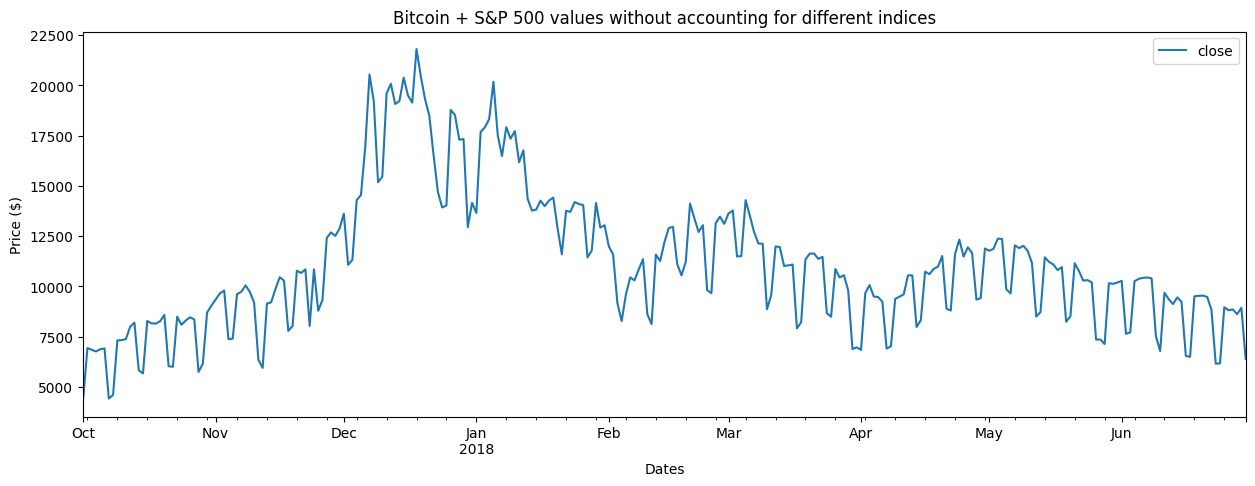

In [ ]:
portfolio['2017-Q4':'2018-Q2'].plot(
    y = 'close',
    figsize = (15, 5),
    legend = True,
    title = 'Bitcoin + S&P 500 values without accounting' \
            ' for different indices',
    ylabel = "Price ($)",
    xlabel = 'Dates'
)

#### Explanation of Forward Fill (`ffill`), Backward Fill (`bfill`), and `nearest` Methods in Pandas

When dealing with missing data in time series or datasets with gaps, Pandas provides multiple methods to fill missing values intelligently. The three methods discussed—`ffill`, `bfill`, and `nearest`—serve different purposes.

---

#### **1. Forward Fill (`ffill` or `pad`)**
- **Functionality**: Propagates the last known (previous) value forward to fill missing values.
- **Use Case**: Useful for filling missing values in time-series data where the previous observation is assumed to hold until a new value appears (e.g., stock market data, temperature readings).
- **Example**:

  ```python
  import pandas as pd
  import numpy as np

  data = {'Date': pd.date_range(start='2023-01-01', periods=5, freq='D'),
          'Value': [10, np.nan, np.nan, 15, np.nan]}
  df = pd.DataFrame(data).set_index('Date')

  df.ffill()
  ```

  **Output:**
  ```
              Value
  Date            
  2023-01-01   10.0
  2023-01-02   10.0
  2023-01-03   10.0
  2023-01-04   15.0
  2023-01-05   15.0
  ```

  Here, missing values take the last observed value.

---

#### **2. Backward Fill (`bfill`)**
- **Functionality**: Fills missing values by propagating the next known value backward.
- **Use Case**: Used when we assume the next available value can be applied backward (though this may be unrealistic for real-time data).
- **Example**:

  ```python
  df.bfill()
  ```

  **Output:**
  ```
              Value
  Date            
  2023-01-01   10.0
  2023-01-02   15.0
  2023-01-03   15.0
  2023-01-04   15.0
  2023-01-05   NaN
  ```

  Missing values take the next known value instead.

---

#### **3. Nearest Fill (`nearest`)**
- **Functionality**: Assigns the missing value from the closest valid observation.
- **Use Case**: Useful when filling missing values in a way that minimizes the gap between known and missing data points.
- **Example**:

  ```python
  df.interpolate(method='nearest')
  ```

  **Output:**
  ```
              Value
  Date            
  2023-01-01   10.0
  2023-01-02   10.0  # Filled from nearest known value (2023-01-01)
  2023-01-03   15.0  # Filled from nearest known value (2023-01-04)
  2023-01-04   15.0
  2023-01-05   15.0
  ```

  - For `2023-01-02`, the nearest value is `10.0` (from `2023-01-01`).
  - For `2023-01-03`, the nearest value is `15.0` (from `2023-01-04`).

---

### **Comparison of Methods**
| Method   | How It Fills | Best Use Case |
|----------|------------|--------------|
| `ffill`  | Uses previous known value | When missing values should be replaced with the last known observation <br>(e.g., stock market prices, temperature data) |
| `bfill`  | Uses next known value | When missing values should take the next valid observation <br>(e.g., upcoming event data) |
| `nearest` | Uses closest known value | When filling based on minimal distance is preferred <br>(e.g., filling missing timestamps in sensor data) |

By choosing the right method, missing values can be handled efficiently while preserving the integrity of time-series data.

In [ ]:
sp.reindex(
    bitcoin.index,
    method='ffill'
).head(10).assign(
    day_of_the_week = lambda x: x.index.day_name()
)

,high,low,open,close,volume,day_of_the_week
date,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,NaN,Sunday
2017-01-02,NaN,NaN,NaN,NaN,NaN,Monday
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3.770530e+09,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3.764890e+09,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3.761820e+09,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Friday
2017-01-07,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Saturday
2017-01-08,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Sunday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3.217610e+09,Monday


In [ ]:
import numpy as np

In [ ]:
sp_reindexed = sp.reindex(
    bitcoin.index,
).assign(
    volume = lambda x: x.volume.fillna(0),
    close = lambda x: x.close.fillna(method='ffill'),
    open = lambda x: np.where(x.open.isnull(), x.close, x.open),
    high = lambda x: np.where(x.high.isnull(), x.close, x.high),
    low = lambda x: np.where(x.low.isnull(), x.close, x.low)
)

<ipython-input-100-a4d07e5a15e1>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  close = lambda x: x.close.fillna(method='ffill'),


***Note:*** The above warning indicates that filling `NaN` values with methods is depreceated by pandas and we should use, `obj.ffill()` or `obj.bfill` instead. So, we will follow that code from hereon.

In [ ]:
sp_reindexed.head(10).assign(
    day_of_the_week = lambda x: x.index.day_name()
)

,high,low,open,close,volume,day_of_the_week
date,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,0.000000e+00,Sunday
2017-01-02,NaN,NaN,NaN,NaN,0.000000e+00,Monday
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3.770530e+09,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3.764890e+09,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3.761820e+09,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Friday
2017-01-07,2276.979980,2276.979980,2276.979980,2276.979980,0.000000e+00,Saturday
2017-01-08,2276.979980,2276.979980,2276.979980,2276.979980,0.000000e+00,Sunday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3.217610e+09,Monday


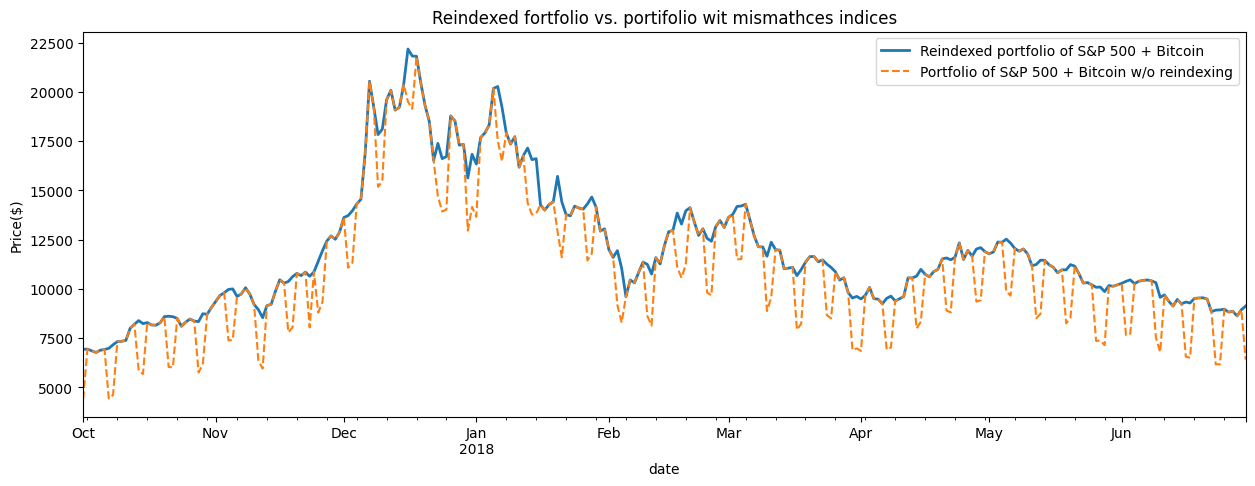

In [ ]:
fixed_portifolio = pd.concat(
    [sp_reindexed, bitcoin],
    sort=False
).groupby(pd.Grouper(freq='D')).sum()

ax = fixed_portifolio['2017-Q4':'2018-Q2'].plot(
    y = 'close',
    label = 'Reindexed portfolio of S&P 500 + Bitcoin',
    figsize = (15,5),
    linewidth=2,
    title = 'Reindexed fortfolio vs. '\
    'portifolio wit mismathces indices'
)

portfolio['2017-Q4' : '2018-Q2'].plot(
    y='close',
    ax = ax,
    linestyle = '--',
    label = 'Portfolio of S&P 500 + Bitcoin w/o reindexing',
    ylabel = 'Price($)'
)

plt.show()

### Restructuring the data

In [ ]:
import pandas as pd

In [ ]:
long_df = pd.read_csv(
    filepath_or_buffer= "/content/Data-Analytics-Learning-and-Projects/Chapter-3/Data/long_data.csv",
    usecols=['date', 'datatype', 'value']
).rename(
    columns = {'value': 'temp_C'}
).assign(
    date = lambda x: pd.to_datetime(x.date),
    temp_F = lambda x: (x.temp_C * 9/5) + 32
)

In [ ]:
long_df.head()

,datatype,date,temp_C,temp_F
0,TMAX,2018-10-01,21.1,69.98
1,TMIN,2018-10-01,8.9,48.02
2,TOBS,2018-10-01,13.9,57.02
3,TMAX,2018-10-02,23.9,75.02
4,TMIN,2018-10-02,13.9,57.02


In [ ]:
long_df.head().T

,0,1,2,3,4
datatype,TMAX,TMIN,TOBS,TMAX,TMIN
date,2018-10-01 00:00:00,2018-10-01 00:00:00,2018-10-01 00:00:00,2018-10-02 00:00:00,2018-10-02 00:00:00
temp_C,21.1,8.9,13.9,23.9,13.9
temp_F,69.98,48.02,57.02,75.02,57.02


***Note:*** After reshaping the data, we will often revisit the data cleaning tasks as things may have changed, or we may need to change things we
couldn't access easily before. For example, we will want to perform
some type conversion if the values were all turned into strings in the
long format, but in the wide format some columns should be
numeric and others are clearly strings.

In [ ]:
long_df.index.shape, long_df.date.sort_values()

((93,),
 0    2018-10-01
 1    2018-10-01
 2    2018-10-01
 3    2018-10-02
 4    2018-10-02
         ...    
 87   2018-10-30
 89   2018-10-30
 91   2018-10-31
 90   2018-10-31
 92   2018-10-31
 Name: date, Length: 93, dtype: datetime64[ns])

In [ ]:
pivoted_df = long_df.pivot(
    columns = 'datatype',
    index = 'date',
    values = 'temp_C'
)
pivoted_df.head()

datatype,TMAX,TMIN,TOBS
date,,,
2018-10-01,21.1,8.9,13.9
2018-10-02,23.9,13.9,17.2
2018-10-03,25.0,15.6,16.1
2018-10-04,22.8,11.7,11.7
2018-10-05,23.3,11.7,18.9


In [ ]:
pivoted_df.dtypes

,0
datatype,
TMAX,float64
TMIN,float64
TOBS,float64


In [ ]:
pivoted_df.head(4)

datatype,TMAX,TMIN,TOBS
date,,,
2018-10-01,21.1,8.9,13.9
2018-10-02,23.9,13.9,17.2
2018-10-03,25.0,15.6,16.1
2018-10-04,22.8,11.7,11.7


In [ ]:
pivoted_df.describe()

datatype,TMAX,TMIN,TOBS
count,31.000000,31.000000,31.000000
mean,16.829032,7.561290,10.022581
std,5.714962,6.513252,6.596550
min,7.800000,-1.100000,-1.100000
25%,12.750000,2.500000,5.550000
50%,16.100000,6.700000,8.300000
75%,21.950000,13.600000,16.100000
max,26.700000,17.800000,21.700000


In [ ]:
pivoted_df = long_df.pivot(
    columns = 'datatype',
    values = ['temp_C', 'temp_F'],
    index = 'date'
)
pivoted_df.head()

temp_C             temp_F              
datatype     TMAX  TMIN  TOBS   TMAX   TMIN   TOBS
date                                              
2018-10-01   21.1   8.9  13.9  69.98  48.02  57.02
2018-10-02   23.9  13.9  17.2  75.02  57.02  62.96
2018-10-03   25.0  15.6  16.1  77.00  60.08  60.98
2018-10-04   22.8  11.7  11.7  73.04  53.06  53.06
2018-10-05   23.3  11.7  18.9  73.94  53.06  66.02

In [ ]:
pivoted_df['temp_F']['TMIN'].head()

,TMIN
date,
2018-10-01,48.02
2018-10-02,57.02
2018-10-03,60.08
2018-10-04,53.06
2018-10-05,53.06


In [ ]:
multi_index_df = long_df.set_index(['date', 'datatype'])
multi_index_df.index[:5]

MultiIndex([('2018-10-01', 'TMAX'),
            ('2018-10-01', 'TMIN'),
            ('2018-10-01', 'TOBS'),
            ('2018-10-02', 'TMAX'),
            ('2018-10-02', 'TMIN')],
           names=['date', 'datatype'])

In [ ]:
multi_index_df.head(9)

temp_C  temp_F
date       datatype                
2018-10-01 TMAX        21.1   69.98
           TMIN         8.9   48.02
           TOBS        13.9   57.02
2018-10-02 TMAX        23.9   75.02
           TMIN        13.9   57.02
           TOBS        17.2   62.96
2018-10-03 TMAX        25.0   77.00
           TMIN        15.6   60.08
           TOBS        16.1   60.98

***Notes:*** The `pivot()` method expects the data to only have one column to set as the index; if we have a multi-level index, we should use `unstack()` instead. We can use `unstack()` on and get a similar result to what we had before. Order matters here because, by default, `unstack()` will move the innermost level of the index to the columns; in this case, that means we will keep the dates in the index and move the datatypes to the column names.

In [ ]:
unstacked_df = multi_index_df.unstack()
unstacked_df.head()

temp_C             temp_F              
datatype     TMAX  TMIN  TOBS   TMAX   TMIN   TOBS
date                                              
2018-10-01   21.1   8.9  13.9  69.98  48.02  57.02
2018-10-02   23.9  13.9  17.2  75.02  57.02  62.96
2018-10-03   25.0  15.6  16.1  77.00  60.08  60.98
2018-10-04   22.8  11.7  11.7  73.04  53.06  53.06
2018-10-05   23.3  11.7  18.9  73.94  53.06  66.02

In [ ]:
long_df

,datatype,date,temp_C,temp_F
0,TMAX,2018-10-01,21.1,69.98
1,TMIN,2018-10-01,8.9,48.02
2,TOBS,2018-10-01,13.9,57.02
3,TMAX,2018-10-02,23.9,75.02
4,TMIN,2018-10-02,13.9,57.02
...,...,...,...,...
88,TMIN,2018-10-30,2.2,35.96
89,TOBS,2018-10-30,5.0,41.00
90,TMAX,2018-10-31,12.2,53.96
91,TMIN,2018-10-31,0.0,32.00


***Note:*** In the book the below results have been achieved by the use of `append()` fucntion which has been depreceated by Pandas and is no longer supported. The code in the book is:

```python
extra_data = long_df.append([{
  'datatype': 'TAVG' ,
  'date':'2018-10-01 ',
  'temp_C' : 10,
  'temp F': 50
}]).set_index(['date','datatype']).sort_index ()
```

In [ ]:
dummy_data = pd.DataFrame({
    'datatype': ['TAVG'],
    'temp_C': [10],
    'temp_F': [50],
    'date': pd.to_datetime(['2018-10-01'])
}).set_index(['date'])
extra_data = pd.concat([long_df, dummy_data]).set_index(['date', 'datatype']).sort_index()
extra_data.head(8)

temp_C  temp_F
date       datatype                
2018-10-01 TMAX        21.1   69.98
           TMIN         8.9   48.02
           TOBS        13.9   57.02
2018-10-02 TMAX        23.9   75.02
           TMIN        13.9   57.02
           TOBS        17.2   62.96
2018-10-03 TMAX        25.0   77.00
           TMIN        15.6   60.08

In [ ]:
extra_data.unstack().head()

temp_C                   temp_F                     
datatype     TAVG  TMAX  TMIN  TOBS   TAVG   TMAX   TMIN   TOBS
date                                                           
NaT          10.0   NaN   NaN   NaN   50.0    NaN    NaN    NaN
2018-10-01    NaN  21.1   8.9  13.9    NaN  69.98  48.02  57.02
2018-10-02    NaN  23.9  13.9  17.2    NaN  75.02  57.02  62.96
2018-10-03    NaN  25.0  15.6  16.1    NaN  77.00  60.08  60.98
2018-10-04    NaN  22.8  11.7  11.7    NaN  73.04  53.06  53.06

In [ ]:
extra_data.unstack(fill_value=-40).head()

temp_C                   temp_F                     
datatype     TAVG  TMAX  TMIN  TOBS   TAVG   TMAX   TMIN   TOBS
date                                                           
NaT          10.0 -40.0 -40.0 -40.0   50.0 -40.00 -40.00 -40.00
2018-10-01  -40.0  21.1   8.9  13.9  -40.0  69.98  48.02  57.02
2018-10-02  -40.0  23.9  13.9  17.2  -40.0  75.02  57.02  62.96
2018-10-03  -40.0  25.0  15.6  16.1  -40.0  77.00  60.08  60.98
2018-10-04  -40.0  22.8  11.7  11.7  -40.0  73.04  53.06  53.06

In [ ]:
wide_df = pd.read_csv('/content/Data-Analytics-Learning-and-Projects/Chapter-3/Data/wide_data.csv')
wide_df.head()

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1
3,2018-10-04,22.8,11.7,11.7
4,2018-10-05,23.3,11.7,18.9


In [ ]:
melted_data = wide_df.melt(
    id_vars='date',
    value_vars=['TMAX', 'TMIN', 'TOBS'],
    value_name='temp_C',
    var_name='measurement'
)
melted_data.head()

,date,measurement,temp_C
0,2018-10-01,TMAX,21.1
1,2018-10-02,TMAX,23.9
2,2018-10-03,TMAX,25.0
3,2018-10-04,TMAX,22.8
4,2018-10-05,TMAX,23.3


In [ ]:
# Extra code to view something
melted_data.set_index('date', drop=False).sort_index()

,date,measurement,temp_C
date,,,
2018-10-01,2018-10-01,TMAX,21.1
2018-10-01,2018-10-01,TOBS,13.9
2018-10-01,2018-10-01,TMIN,8.9
2018-10-02,2018-10-02,TMAX,23.9
2018-10-02,2018-10-02,TOBS,17.2
...,...,...,...
2018-10-30,2018-10-30,TMAX,13.3
2018-10-30,2018-10-30,TOBS,5.0
2018-10-31,2018-10-31,TMIN,0.0


In [ ]:
pd.DataFrame.stack

<function pandas.core.frame.DataFrame.stack(self, level: 'IndexLabel' = -1, dropna: 'bool | lib.NoDefault' = <no_default>, sort: 'bool | lib.NoDefault' = <no_default>, future_stack: 'bool' = False)>

In [ ]:
wide_df.set_index('date', inplace=True)
stacked_series=wide_df.stack()
stacked_series.head()

date            
2018-10-01  TMAX    21.1
            TMIN     8.9
            TOBS    13.9
2018-10-02  TMAX    23.9
            TMIN    13.9
dtype: float64

***!Important:***
`.stack()` method might return `Series` object inplace of a `DataFrame` which might be needed to be converted into `DataFrame`.



In [ ]:
stacked_series.index[:5]

MultiIndex([('2018-10-01', 'TMAX'),
            ('2018-10-01', 'TMIN'),
            ('2018-10-01', 'TOBS'),
            ('2018-10-02', 'TMAX'),
            ('2018-10-02', 'TMIN')],
           names=['date', None])

In [ ]:
stacked_series.index.rename(['date', 'datatype'], inplace=True)
stacked_series.index.names

FrozenList(['date', 'datatype'])

### Handling duplicates, missing, or invalid data

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(filepath_or_buffer='/content/Data-Analytics-Learning-and-Projects/Chapter-3/Data/dirty_data.csv')

In [4]:
df.head()

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
0,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
1,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
2,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
3,2018-01-02T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-8.3,-16.1,-12.2,NaN,False
4,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               765 non-null    object 
 1   station            765 non-null    object 
 2   PRCP               765 non-null    float64
 3   SNOW               577 non-null    float64
 4   SNWD               577 non-null    float64
 5   TMAX               765 non-null    float64
 6   TMIN               765 non-null    float64
 7   TOBS               398 non-null    float64
 8   WESF               11 non-null     float64
 9   inclement_weather  408 non-null    object 
dtypes: float64(7), object(3)
memory usage: 59.9+ KB


In [6]:
df.nunique()

,0
date,324
station,2
PRCP,96
SNOW,9
SNWD,2
TMAX,69
TMIN,68
TOBS,69
WESF,7
inclement_weather,2


In [7]:
df.describe()

/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:52: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF
count,765.000000,577.000000,577.0,765.000000,765.000000,398.000000,11.000000
mean,5.360392,4.202773,NaN,2649.175294,-15.914379,8.632161,16.290909
std,10.002138,25.086077,NaN,2744.156281,24.242849,9.815054,9.489832
min,0.000000,0.000000,-inf,-11.700000,-40.000000,-16.100000,1.800000
25%,0.000000,0.000000,NaN,13.300000,-40.000000,0.150000,8.600000
50%,0.000000,0.000000,NaN,32.800000,-11.100000,8.300000,19.300000
75%,5.800000,0.000000,NaN,5505.000000,6.700000,18.300000,24.900000
max,61.700000,229.000000,inf,5505.000000,23.900000,26.100000,28.700000


***Note:*** Note that, <mark>if we use the method on the DataFrame object, the result will tell us which rows have all null values</mark>, which isn't what we want in this case. Here, we want to examine the rows that have null values in the SNOW, SNWD, TOBS, WESF, or inclement_weather columns. This means that we will need to combine checks for each of the columns with the I (OR) operator:

In [8]:
df.isnull()

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
0,False,False,False,False,False,False,False,True,True,True
1,False,False,False,False,False,False,False,True,True,True
2,False,False,False,False,False,False,False,True,True,True
3,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
760,False,False,False,False,False,False,False,False,True,False
761,False,False,False,False,False,False,False,False,True,False
762,False,False,False,False,False,False,False,False,True,False
763,False,False,False,False,False,False,False,True,True,True


The `isnull()` and `isnan()` methods are not the same, and they serve different purposes depending on the context in which they are used. The distinction largely depends on the programming language or library you're working with, such as Python with pandas or NumPy. Let’s break it down:

##### 1. **`isnull()`**
- **Commonly associated with:** Python's pandas library.
- **Purpose:** Detects missing values, which include both `NaN` (Not a Number) and `None`.
- **What it checks for:** It identifies any value that pandas considers "null" or missing. In pandas, this includes:
  - `NaN` (from NumPy),
  - `None` (Python’s null object),
  - And, in newer versions of pandas, `pd.NA` (pandas' nullable scalar).
- **Behavior:** Returns `True` for any missing value, not just `NaN`.
- **Example in pandas:**
  ```python
  import pandas as pd
  import numpy as np

  s = pd.Series([1, np.nan, None])
  print(s.isnull())
  # Output:
  # 0    False
  # 1     True
  # 2     True
  # dtype: bool
  ```

##### 2. **`isnan()`**
- **Commonly associated with:** Python's NumPy library (`np.isnan()`) or the built-in `math` module (`math.isnan()`).
- **Purpose:** Specifically checks for `NaN` values (from the IEEE 754 floating-point specification).
- **What it checks for:** Only detects `NaN`. It does not recognize `None` or other "null-like" values as `NaN`.
- **Behavior:** Returns `True` only for `NaN` and will raise an error or return `False` for non-numeric types like `None` (depending on the implementation).
- **Example with NumPy:**
  ```python
  import numpy as np

  s = [1, np.nan, None]
  print(np.isnan(s))
  # Output (NumPy array version):
  # [False  True  TypeError: ufunc 'isnan' not supported for the input types]
  # Note: np.isnan() expects numeric input, so None causes an error unless handled.
  ```

##### Key Differences
| Feature                | `isnull()` (pandas)             | `isnan()` (NumPy/math)         |
|------------------------|----------------------------------|--------------------------------|
| **Library**            | pandas                         | NumPy or math module          |
| **Detects `NaN`**      | Yes                            | Yes                           |
| **Detects `None`**     | Yes                            | No (raises error in NumPy)    |
| **Detects `pd.NA`**    | Yes (in pandas)                | No                            |
| **Input Type**         | Works on pandas Series/DataFrame | Numeric arrays or scalars    |
| **Purpose**            | General missing value detection| Specific `NaN` detection     |

##### Practical Example
```python
import pandas as pd
import numpy as np

# pandas Series
s = pd.Series([1, np.nan, None])

# Using isnull()
print("Using isnull():")
print(s.isnull())
# Output:
# 0    False
# 1     True
# 2     True

# Using isnan() (convert to NumPy array first)
print("Using isnan():")
print(np.isnan(s))
# Output:
# TypeError: ufunc 'isnan' not supported for input type (None)
# Fix by replacing None with np.nan first:
s = s.fillna(np.nan)
print(np.isnan(s))
# Output:
# 0    False
# 1     True
# 2     True
```

In [9]:
# In book a different approach is used which is:

# contain_nulls = df[
#     df.SNOW.isnull() | df.SNWD.isna() \
#     | pd.isnull(df.TOBS) | pd.isna(df.WESF) \
#     | df.inclement_weather.isna()
# ]

contains_null = df[df[['SNOW','SNWD', 'TOBS', 'WESF', 'inclement_weather']].isnull().any(axis=1)]

In [10]:
contains_null.shape[0]

765

In [11]:
contains_null.head()

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
0,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
1,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
2,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
3,2018-01-02T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-8.3,-16.1,-12.2,NaN,False
4,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False


In [12]:
import numpy as np

***Note:*** Note that we can't check whether the value of the column is equal to NaN because `np.nan` is not equal to anything:

In [13]:
df[df.inclement_weather == 'NaN'].shape[0], df[df.inclement_weather == np.nan].shape[0]

(0, 0)

In [14]:
df[df.inclement_weather.isna()].shape[0]

357

In [15]:
df[df.SNWD.isin([-np.inf, np.inf])].shape[0]

577

In [16]:
def get_inf_count(df):

  """
  Find the number of inf/-inf values per column
  in dataFrame
  """
  return{
      col: df[
          df[col].isin([np.inf, -np.inf])
      ].shape[0] for col in df.columns
  }

# The code:
      # df[
      #     df[col].isin([np.inf, -np.inf])
      # ]
# will give df having rows where the condition is met with all the columns
# which in this case is 10 but, since we are storing only the number of rows
# by, .shape[0], we will get the number of rows for which the condition is met.

In [17]:
get_inf_count(df)

{'date': 0,
 'station': 0,
 'PRCP': 0,
 'SNOW': 0,
 'SNWD': 577,
 'TMAX': 0,
 'TMIN': 0,
 'TOBS': 0,
 'WESF': 0,
 'inclement_weather': 0}

In [18]:
pd.DataFrame(
    {
        'np.inf Snow Depth': df.SNOW[df.SNWD == np.inf].describe(),
        '-np.inf Snow Depth': df.SNOW[df.SNWD == -np.inf].describe()
    }
).T

,count,mean,std,min,25%,50%,75%,max
np.inf Snow Depth,24.0,101.041667,74.498018,13.0,25.0,120.5,152.0,229.0
-np.inf Snow Depth,553.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [19]:
df.describe(include='object')

,date,station,inclement_weather
count,765,765,408
unique,324,2,2
top,2018-07-05T00:00:00,GHCND:USC00280907,False
freq,8,398,384


In [20]:
df.station.unique()

array(['?', 'GHCND:USC00280907'], dtype=object)

In [21]:
df.station.value_counts()

,count
station,
GHCND:USC00280907,398
?,367


In [22]:
df[df.duplicated()].shape[0]

284

In [23]:
df[df.duplicated(keep=False)].shape[0]

482

In [24]:
df[df.duplicated(subset=['date', 'station'])].shape[0]

284

In [25]:
df[df.duplicated()].head()

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
1,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
2,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
5,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
6,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
8,2018-01-04T00:00:00,?,20.6,229.0,inf,5505.0,-40.0,NaN,19.3,True


#### Mitigating the issues

##### **1.Deduplication**

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               765 non-null    object 
 1   station            765 non-null    object 
 2   PRCP               765 non-null    float64
 3   SNOW               577 non-null    float64
 4   SNWD               577 non-null    float64
 5   TMAX               765 non-null    float64
 6   TMIN               765 non-null    float64
 7   TOBS               398 non-null    float64
 8   WESF               11 non-null     float64
 9   inclement_weather  408 non-null    object 
dtypes: float64(7), object(3)
memory usage: 59.9+ KB


***Note: Concise Analysis of DataFrame Manipulation in the Given Code***

This note addresses the user’s queries about the code’s logic, focusing on sorting by 'station', deduplication, reassigning 'WESF', and comparing `assign` with `pd.concat`.

###### Code Overview
The code manipulates a DataFrame with 'date', 'station', and 'WESF' columns:
- Saves `station_qm_wesf = df[df.station == '?'].WESF` (non-null 'WESF' for '?' stations).
- Sorts by 'station' descending, prioritizing valid stations (e.g., 'ABC' before '?').
- Deduplicates by 'date', keeping the first row (valid station if present).
- Drops 'station' and 'WESF', sorts by 'date', and reassigns 'WESF' using `assign`.

###### Why Sort by 'station'?
- Sorting ensures valid station rows come first for each date.
- Deduplication keeps these rows over '?' rows, improving data quality.
- Dropping 'station' later doesn’t negate its role in filtering duplicates.

###### Impact of Reassigning 'WESF'
- Non-null 'WESF' values (from '?' rows) are often dropped during deduplication if a valid station exists.
- `assign(WESF=station_qm_wesf)` aligns by index:
  - Dates with valid stations get 'WESF' = NaN (no index match).
  - Dates with only '?' stations keep non-null 'WESF'.
- This prioritizes valid station data, using 'WESF' only when no valid station exists.

###### `assign` vs. `pd.concat`
- **`assign`**: Keeps DataFrame’s indices, assigns Series values where indices match, fills NaN elsewhere. No new rows.
- **`pd.concat(axis=1)`**: Uses union of indices, adding rows for Series’ unique indices, which could disrupt deduplication.
- `assign` is better here to maintain structure.

###### Example
- Original: Index 0 ('ABC', NaN), Index 1 ('?', 20) for '2023-01-01'.
- After sorting and dedup: Keeps Index 0.
- `assign`: 'WESF' = NaN (Index 0 not in `station_qm_wesf`).

###### Conclusion
Sorting by 'station' is essential for quality deduplication. `assign` ensures 'WESF' is reassigned correctly, avoiding extra rows `concat` might add. The logic prioritizes valid stations, keeping 'WESF' only for '?'-only dates.

###### Citations
- [Pandas assign](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.assign.html)
- [Pandas concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)

In [27]:
# The below code lets us know that all the non-null values of WESF are in that
# rows which have the station as '?' so, if we remove values having station
# '?' we will end up removing all the rows where WESF values are valid so, we
# would need to store those values before dealing with duplicates as done
# below.

df[df.WESF.notna()].station.unique()

array(['?'], dtype=object)

In [28]:
# save the WESF column for later
station_qm_wesf = df[df.station == '?'].WESF

# sort ? to the bottom
df.sort_values('station', ascending=False, inplace=True)

# drop duplicates based on the date column keeping the first
# occurrence which will be the valid station if it has data
df_deduped = df.drop_duplicates('date').drop(
    # remove the station column because we are done with it
    # and WESF because we need to replace it later
    columns = ['station', 'WESF']
).sort_values('date').assign(
    # sort by the date
    # add back the WESF, which will be properly matched due to index
    WESF = station_qm_wesf
)

df_deduped.shape

(324, 9)

In [29]:
station_qm_wesf.index.shape[0]

367

In [30]:
station_qm_wesf.value_counts()

,count
WESF,
24.9,3
8.6,2
19.3,2
28.7,1
1.8,1
3.0,1
15.2,1


In [31]:
df_deduped.WESF.value_counts()

,count
WESF,
19.3,1
24.9,1


In [32]:
df_deduped.head()

,date,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,inclement_weather,WESF
0,2018-01-01T00:00:00,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
3,2018-01-02T00:00:00,0.0,0.0,-inf,-8.3,-16.1,-12.2,False,NaN
6,2018-01-03T00:00:00,0.0,0.0,-inf,-4.4,-13.9,-13.3,False,NaN
8,2018-01-04T00:00:00,20.6,229.0,inf,5505.0,-40.0,NaN,True,19.3
11,2018-01-05T00:00:00,14.2,127.0,inf,-4.4,-13.9,-13.9,True,NaN


In [39]:
# df_deduped.dropna

In [36]:
df_deduped.dropna().shape

(0, 9)

In [37]:
df_deduped.dropna(how='all').shape

(324, 9)

In [40]:
df_deduped.dropna(
    how='all',
    subset=['inclement_weather', 'SNOW', 'SNWD']
).shape

(293, 9)

In [41]:
df_deduped.dropna(
    axis = 1,
    thresh = df_deduped.shape[0] * 0.75
).columns

Index(['date', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'TOBS',
       'inclement_weather'],
      dtype='object')

***Explanation:***

To fill null values in with other data, we use the `fillna()` method, which gives us the option of specifying a value or a strategy of how to perform the filling. Let's discuss filling with a single value first. The WESF column is mostly null values, but since it is a measurement in milliliters that takes on the value of NaN when there is no water equivalent of snowfall, we can fill the nulls with zeroes.

In [42]:
df_deduped.loc[:'WESF'].fillna(0, inplace=True)
df_deduped.head()

<ipython-input-42-27ae9be0d1dc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_deduped.loc[:'WESF'].fillna(0, inplace=True)


,date,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,inclement_weather,WESF
0,2018-01-01T00:00:00,0.0,0.0,-inf,5505.0,-40.0,0.0,0,0.0
3,2018-01-02T00:00:00,0.0,0.0,-inf,-8.3,-16.1,-12.2,False,0.0
6,2018-01-03T00:00:00,0.0,0.0,-inf,-4.4,-13.9,-13.3,False,0.0
8,2018-01-04T00:00:00,20.6,229.0,inf,5505.0,-40.0,0.0,True,19.3
11,2018-01-05T00:00:00,14.2,127.0,inf,-4.4,-13.9,-13.9,True,0.0


In [43]:
df_deduped.shape

(324, 9)

***Explanation:***
At this point, we have done everything we can without distorting the data. We know that we are missing dates, but if we reindex, we don't know how to fill in the `NaN` data. With the weather data, we can't assume that because it snowed one day that it will snow the next or that the temperature will be the same. For this reason, note that the following few examples are just for illustrative purposes only—just because we can do something doesn't mean we should. The right solution will most likely depend on the domain and the problem we are looking to solve.

***Explanation:*** We know that when TMAX is the temperature of the Sun, it must be because there was no measured value, so let's replace it with NaN and then make an assumption that the temperature won't change drastically day-to-day. Note that this is actually a big assumption, but it will allow us to understand how `fillna()` works when we provide a strategy through the method parameter. We will also do this for TMIN, which currently uses -400C for its placeholder, despite the coldest temperature ever recorded in NYC being -150F (-26.10C) on February 9, 1934.

In [44]:
df_deduped.assign(
    TMAX = lambda x: x.TMAX.replace(5505, np.nan)\
            .ffill(),
    TMIN = lambda x: x.TMIN.replace(-40, np.nan)\
            .ffill()
).head()

,date,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,inclement_weather,WESF
0,2018-01-01T00:00:00,0.0,0.0,-inf,NaN,NaN,0.0,0,0.0
3,2018-01-02T00:00:00,0.0,0.0,-inf,-8.3,-16.1,-12.2,False,0.0
6,2018-01-03T00:00:00,0.0,0.0,-inf,-4.4,-13.9,-13.3,False,0.0
8,2018-01-04T00:00:00,20.6,229.0,inf,-4.4,-13.9,0.0,True,19.3
11,2018-01-05T00:00:00,14.2,127.0,inf,-4.4,-13.9,-13.9,True,0.0


***Note:*** Instead of using `obj.ffill` or `obj.bfill`, `pd.DataFrame.interpolate` or `pd.Series.interpolate` can be used in specific situations.

Ref: [Interpolation using Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html#pandas.DataFrame.interpolate)

In [50]:
df_deduped.assign(
    SNWD = lambda x: np.nan_to_num(x.SNWD)
).head()

/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,date,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,inclement_weather,WESF
0,2018-01-01T00:00:00,0.0,0.0,-1.797693e+308,5505.0,-40.0,0.0,0,0.0
3,2018-01-02T00:00:00,0.0,0.0,-1.797693e+308,-8.3,-16.1,-12.2,False,0.0
6,2018-01-03T00:00:00,0.0,0.0,-1.797693e+308,-4.4,-13.9,-13.3,False,0.0
8,2018-01-04T00:00:00,20.6,229.0,1.797693e+308,5505.0,-40.0,0.0,True,19.3
11,2018-01-05T00:00:00,14.2,127.0,1.797693e+308,-4.4,-13.9,-13.9,True,0.0


In [52]:
df_deduped.head()

,date,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,inclement_weather,WESF
0,2018-01-01T00:00:00,0.0,0.0,-inf,5505.0,-40.0,0.0,0,0.0
3,2018-01-02T00:00:00,0.0,0.0,-inf,-8.3,-16.1,-12.2,False,0.0
6,2018-01-03T00:00:00,0.0,0.0,-inf,-4.4,-13.9,-13.3,False,0.0
8,2018-01-04T00:00:00,20.6,229.0,inf,5505.0,-40.0,0.0,True,19.3
11,2018-01-05T00:00:00,14.2,127.0,inf,-4.4,-13.9,-13.9,True,0.0


In [54]:
df_deduped.assign(
    TMAX = lambda x: x.TMAX.replace(5505, np.nan)\
          .fillna(x.TMAX.median()),
    TMIN = lambda x: x.TMIN.replace(-40, np.nan)\
          .fillna(x.TMIN.median()),
    #average of TMAX and TMIN
    TOBS = lambda x: x.TOBS.fillna((x.TMAX + x.TMIN)/2)
).head()

,date,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,inclement_weather,WESF
0,2018-01-01T00:00:00,0.0,0.0,-inf,22.8,0.0,0.0,0,0.0
3,2018-01-02T00:00:00,0.0,0.0,-inf,-8.3,-16.1,-12.2,False,0.0
6,2018-01-03T00:00:00,0.0,0.0,-inf,-4.4,-13.9,-13.3,False,0.0
8,2018-01-04T00:00:00,20.6,229.0,inf,22.8,0.0,0.0,True,19.3
11,2018-01-05T00:00:00,14.2,127.0,inf,-4.4,-13.9,-13.9,True,0.0


In [58]:
df_deduped.assign(
        TMAX = lambda x: x.TMAX.replace(5505, np.nan),
        TMIN = lambda x: x.TMIN.replace(-40, np.nan)
).set_index('date').apply(
    lambda x: x.fillna(x.rolling(7, min_periods=0).median())
).head(10)

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,inclement_weather,WESF
date,,,,,,,,
2018-01-01T00:00:00,0.0,0.0,-inf,NaN,NaN,0.0,0,0.0
2018-01-02T00:00:00,0.0,0.0,-inf,-8.30,-16.1,-12.2,False,0.0
2018-01-03T00:00:00,0.0,0.0,-inf,-4.40,-13.9,-13.3,False,0.0
2018-01-04T00:00:00,20.6,229.0,inf,-6.35,-15.0,0.0,True,19.3
2018-01-05T00:00:00,14.2,127.0,inf,-4.40,-13.9,-13.9,True,0.0
2018-01-06T00:00:00,0.0,0.0,-inf,-10.00,-15.6,-15.0,False,0.0
2018-01-07T00:00:00,0.0,0.0,-inf,-11.70,-17.2,-16.1,False,0.0
2018-01-08T00:00:00,0.0,0.0,-inf,-7.80,-16.7,-8.3,False,0.0
2018-01-10T00:00:00,0.0,0.0,-inf,5.00,-7.8,-7.8,False,0.0


In [56]:
# pd.Series.rolling

In [60]:
df_deduped.assign(
        TMAX = lambda x: x.TMAX.replace(5505, np.nan),
        TMIN = lambda x: x.TMIN.replace(-40, np.nan),
        date = lambda x: pd.to_datetime(x.date)
).set_index('date').reindex(
    pd.date_range('2018-01-01', '2018-12-31', freq='D')
).apply(
    lambda x: x.interpolate()
).head(10)

<ipython-input-60-75c3eb33df78>:8: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  lambda x: x.interpolate()


,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,inclement_weather,WESF
2018-01-01,0.0,0.0,-inf,NaN,NaN,0.00,0,0.0
2018-01-02,0.0,0.0,-inf,-8.3,-16.10,-12.20,False,0.0
2018-01-03,0.0,0.0,-inf,-4.4,-13.90,-13.30,False,0.0
2018-01-04,20.6,229.0,inf,-4.4,-13.90,0.00,True,19.3
2018-01-05,14.2,127.0,inf,-4.4,-13.90,-13.90,True,0.0
2018-01-06,0.0,0.0,-inf,-10.0,-15.60,-15.00,False,0.0
2018-01-07,0.0,0.0,-inf,-11.7,-17.20,-16.10,False,0.0
2018-01-08,0.0,0.0,-inf,-7.8,-16.70,-8.30,False,0.0
2018-01-09,0.0,0.0,-inf,-1.4,-12.25,-8.05,NaN,0.0
2018-01-10,0.0,0.0,-inf,5.0,-7.80,-7.80,False,0.0


## Exercises